In [9]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#matplotlib notebook

In [26]:
class pickle_tof():
    def __init__(self,filename):
        self.filename=filename
    def pickle_to_list(self):
        valid_values=[]
        with open(filename, 'rb') as f:
            data = pickle.load(f)
            #print(len(data))
            for datanum in range(len(data)):
                a=data[datanum].get('ids')
                if len(a)==0:
                    pass
                else:
                    for num in range(len(a)):
                        #from IPython import embed;embed()
                        if data[datanum].get('speed')[num][0]>1:
                            valid_values.append([data[datanum].get('speed')[num][0],data[datanum].get('ids')[num][0],
                                                 data[datanum].get('depth')[num][2]])
        return valid_values
    
    def transform_list_data(self,valid_values,flip=True,speed=10,flip_range=2):
        
        array=np.array(valid_values)
        array_mod=array.copy()
        if flip:
            for num in range(len(array)):
                if num+1<len(array):
                    if abs(array[num+1][2]-array[num][2])>flip_range and array[num+1][1]==array[num][1]:
                        flip=False
                    if flip:
                        array_mod[num][2]=array[num][2]+18.737
        
        self.df=pd.DataFrame(array_mod,columns=["speed","id","depth"])   
        self.ids=self.df['id'].drop_duplicates().tolist()
        self.depths=np.array(self.df['depth'].drop_duplicates())
        self.vel_std=np.ones(len(self.depths))*speed
        self.depth_ranges=np.linspace(round(self.depths.max()+1),0,num=(int(round(self.depths.max()+1)/0.5)))
        self.resumed=[]
        for i in self.ids:
            dfmask=self.df["id"]==i
            results=self.df[dfmask]
            for num,depth_r in enumerate(self.depth_ranges):
                if num+1<len(self.depth_ranges):
                    dfmask1=results["depth"]<=depth_r;  dfmask2=results["depth"]>self.depth_ranges[num+1]
                    dfmask3=dfmask1 & dfmask2
                    filt_results=results[dfmask3]
                    check=filt_results.empty
                    if check==False:
                    #from IPython import embed;embed()
                        speed_mean=filt_results["speed"].mean(); speed_std=filt_results["speed"].std()
                        self.resumed.append([self.depth_ranges[num+1],speed_mean,speed_std,i])
        self.dfresumed=pd.DataFrame(self.resumed,columns=["depth_range","vel_mean","vel_std","id"])
        
    def plot_data(self,title="No Title"):
        ax = plt.subplot(111)
        for i in self.ids:

            dfmask=self.dfresumed["id"]==i
            results=self.dfresumed[dfmask]
            plt.errorbar(results["depth_range"],results["vel_mean"],results["vel_std"],marker='o', label=i)
            #plt.plot(results["depth_range"], results["speed"],marker='o',linestyle='None', label=i)

        plt.plot(self.depths, self.vel_std, label="vel 10km/h")
        plt.xlabel("Depth [m]")
        plt.ylabel("Speed [km/h]")
        leg = plt.legend(loc='best',bbox_to_anchor=(1.20, 1.20))
        plt.title(title)
        plt.show()
            

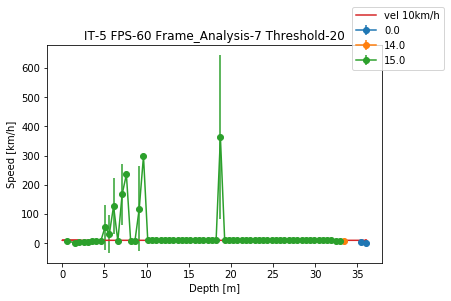

In [30]:
filename="C:/Users/ricar/Desktop/PUMA/TOF/pickle/infolist7T20.pkl"
pck=pickle_tof(filename)
pck_list=pck.pickle_to_list()
pck.transform_list_data(pck_list,flip=True,speed=10)
pck.plot_data("IT-5 FPS-60 Frame_Analysis-7 Threshold-20")

In [25]:
pck_list

[[1.1116159, 0, 17.340286],
 [1.2936134, 0, 17.3345],
 [1.1524199, 0, 17.356705],
 [8.841298, 15, 13.603494],
 [9.452888, 15, 13.506463],
 [8.752907, 15, 13.506463],
 [9.551847, 15, 13.395515],
 [9.197102, 15, 13.299177],
 [9.164371, 15, 13.331736],
 [8.929593, 15, 13.283575],
 [8.548509, 15, 13.330488],
 [8.68636, 15, 13.233608],
 [9.544341, 15, 13.152556],
 [8.78197, 15, 13.152556],
 [9.332036, 15, 13.027704],
 [9.490164, 15, 13.027704],
 [9.014839, 15, 12.997252],
 [9.107289, 15, 12.980675],
 [8.622966, 15, 12.980675],
 [8.783015, 15, 12.855771],
 [9.070417, 15, 12.758968],
 [10.179279, 15, 12.701776],
 [9.878326, 15, 12.714267],
 [9.354023, 15, 12.694865],
 [9.786407, 15, 12.6386385],
 [10.155257, 15, 12.53746],
 [9.900412, 15, 12.476285],
 [9.860094, 15, 12.441192],
 [9.981105, 15, 12.424387],
 [9.923617, 15, 12.335451],
 [10.191696, 15, 12.298234],
 [10.349968, 15, 12.201609],
 [10.358005, 15, 12.194049],
 [10.3080015, 15, 12.173458],
 [9.70638, 15, 12.160036],
 [10.393771, 15, 1

In [29]:
pck.resumed

[[35.986301369863014, 1.1858830451965332, 0.09550189971923828, 0.0],
 [31.93150684931507, 9.013875007629395, 0.3477048873901367, 15.0],
 [31.424657534246574, 9.263221740722656, 0.4628309905529022, 15.0],
 [30.91780821917808, 10.05628490447998, 0.2133922576904297, 15.0],
 [30.410958904109588, 10.205848693847656, 0.48487040400505066, 15.0],
 [29.904109589041095, 10.610540390014648, 0.47126051783561707, 15.0],
 [29.397260273972602, 10.678973197937012, 0.23882180452346802, 15.0],
 [28.89041095890411, 10.920473098754883, 0.31552186608314514, 15.0],
 [28.383561643835616, 11.31220817565918, 0.3475097417831421, 15.0],
 [27.876712328767123, 11.688166618347168, 0.4729037880897522, 15.0],
 [27.36986301369863, 11.950767517089844, 0.23565532267093658, 15.0],
 [26.863013698630137, 11.992109298706055, 0.513183057308197, 15.0],
 [26.35616438356164, 12.14223575592041, 0.3141617178916931, 15.0],
 [25.849315068493148, 12.229426383972168, 0.2581581473350525, 15.0],
 [25.342465753424655, 12.296072006225586